In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn import metrics 

import warnings
warnings.simplefilter("ignore")

In [51]:
#smol = pd.DataFrame(pd.read_excel('datasets/smol.xlsx',sheet_name='Rawdata'))
df = pd.read_csv('datasets/Big_Dataset_1000.csv')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ID                    1002 non-null   int64
 1   age_group             1002 non-null   int64
 2   Sex                   1002 non-null   int64
 3   Fever                 1002 non-null   int64
 4   Cough                 1002 non-null   int64
 5   Resp_dist             1002 non-null   int64
 6   Sore throat           1002 non-null   int64
 7   Chest pain            1002 non-null   int64
 8   Headache              1002 non-null   int64
 9   Diarrhea              1002 non-null   int64
 10  Dyspnea               1002 non-null   int64
 11  Myalgia               1002 non-null   int64
 12  Sleep disturbance     1002 non-null   int64
 13  Smoking habits        1002 non-null   int64
 14  Physical exercise     1002 non-null   int64
 15  Diabetes              1002 non-null   int64
 16  Hypert

In [53]:
df.head()

,ID,age_group,Sex,Fever,Cough,Resp_dist,Sore throat,Chest pain,Headache,Diarrhea,...,Cancer,Kidney problems,Fear of re-infection,Hozpitalization,Self-medication,Persistent symptoms,Depression,Sputum production,Lack of appetite,Fatigue
0,1,1,1,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,1,0,0
1,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4,1,0,1,1,0,1,1,1,0,...,0,0,0,1,0,0,1,0,1,1
4,5,1,0,1,1,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [54]:
df = df.drop(0)

In [55]:
df.head()

,ID,age_group,Sex,Fever,Cough,Resp_dist,Sore throat,Chest pain,Headache,Diarrhea,...,Cancer,Kidney problems,Fear of re-infection,Hozpitalization,Self-medication,Persistent symptoms,Depression,Sputum production,Lack of appetite,Fatigue
1,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4,1,0,1,1,0,1,1,1,0,...,0,0,0,1,0,0,1,0,1,1
4,5,1,0,1,1,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
5,6,1,0,1,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,1


In [56]:
df.shape

(1001, 28)

In [57]:
#frankenstein = pd.concat([large, smol])

In [58]:
#frankenstein.head()

In [59]:
df.columns

Index(['ID', 'age_group', 'Sex', 'Fever', 'Cough', 'Resp_dist', 'Sore throat',
       'Chest pain', 'Headache', 'Diarrhea', 'Dyspnea', 'Myalgia',
       'Sleep disturbance', 'Smoking habits', 'Physical exercise', 'Diabetes',
       'Hypertension', 'Heart disease', 'Cancer', 'Kidney problems',
       'Fear of re-infection', 'Hozpitalization', 'Self-medication',
       'Persistent symptoms', 'Depression', 'Sputum production',
       'Lack of appetite', 'Fatigue'],
      dtype='object')

In [60]:
#frankenstein.columns

In [61]:
#frankenstein.to_csv(r'datasets\frankenstein.csv', index=False)


In [62]:
df["Persistent symptoms"].value_counts()

0    802
1    199
Name: Persistent symptoms, dtype: int64

In [63]:
df["Kidney problems"].value_counts()

0    942
1     59
Name: Kidney problems, dtype: int64

In [64]:
df_pivot = pd.pivot_table(df, index='Persistent symptoms',values=["Heart disease", "Diabetes","Cancer","Kidney problems","Resp_dist","Hypertension","Headache"], aggfunc=['count'])
df_pivot.head()

count                                               \
                    Cancer Diabetes Headache Heart disease Hypertension   
Persistent symptoms                                                       
0                      802      802      802           802          802   
1                      199      199      199           199          199   

                                               
                    Kidney problems Resp_dist  
Persistent symptoms                            
0                               802       802  
1                               199       199

In [65]:
df.rename(columns = {'Persistent symptoms':'Persistent_symptoms'}, inplace = True)

In [66]:
sset = df[df.Persistent_symptoms == 1]

In [67]:
sset.head(10)

,ID,age_group,Sex,Fever,Cough,Resp_dist,Sore throat,Chest pain,Headache,Diarrhea,...,Cancer,Kidney problems,Fear of re-infection,Hozpitalization,Self-medication,Persistent_symptoms,Depression,Sputum production,Lack of appetite,Fatigue
2,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
6,7,1,0,1,0,0,1,0,1,1,...,0,0,1,0,0,1,0,0,1,1
10,11,1,1,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,1,0,1
11,12,1,1,1,0,0,1,1,1,0,...,0,0,1,0,0,1,1,0,0,1
16,17,1,1,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,1,1
39,40,2,0,1,1,0,1,1,1,0,...,0,0,1,0,0,1,0,1,1,1
41,42,1,0,1,1,0,1,0,1,1,...,0,0,1,0,0,1,1,0,1,0
52,53,1,0,1,1,0,1,0,0,1,...,0,0,1,1,0,1,1,0,0,1
53,54,1,1,1,1,1,0,0,1,1,...,1,1,1,1,0,1,1,1,1,1
65,66,2,1,1,1,0,1,1,0,1,...,0,0,1,0,0,1,1,0,1,1


In [68]:
#labels = ["Heart disease", "Diabetes","Cancer","Kidney problems","Resp_dist","Hypertension","Headache","Chestpain_A"]

#df["Persistent_symptoms"].value_counts().plot(kind="pie",labels=labels,subplots=True,autopct='%1.0f%%')

# Decision Tree

In [69]:
x = df.drop(['Persistent_symptoms'], axis=1)

y = df[['Persistent_symptoms']]

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [71]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
predictions = model.predict(x_test)

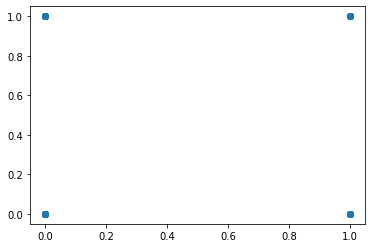

In [73]:
plt.scatter(y_test, predictions)

In [74]:
#Mean Absolute Error (MAE)

mae(y_test, predictions)

0.2059800664451827

In [75]:
#Mean Squared Error (MSE)
mean_squared_error(y_test, predictions)

0.2059800664451827

In [76]:
y_pred = model.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : ',RMSE) # RMSE : Root Mean Square Error

RMSE :  0.45385026875081025


# Accuracy on test data

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       234
           1       0.55      0.45      0.49        67

    accuracy                           0.79       301
   macro avg       0.70      0.67      0.68       301
weighted avg       0.78      0.79      0.79       301



In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.7940199335548173


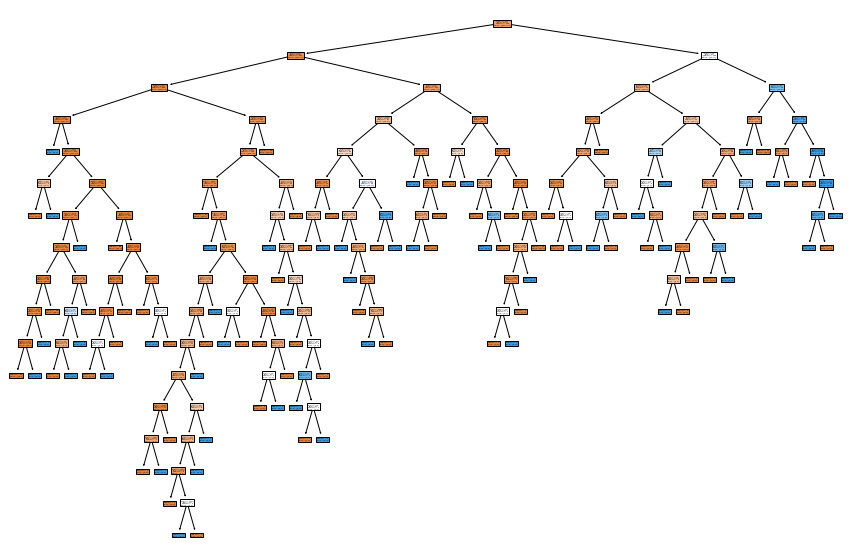

In [79]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()